In [192]:

import pandas as pd 
import numpy as np

In [193]:
df_bond = pd.read_csv('/Users/katyasva/Downloads/DTB4WK.csv')
df_bond = df_bond.rename(columns={'observation_date': 'Date'})
df_bond = df_bond.rename(columns={'DTB4WK': 'Change_bond'})
df_bond['Date'] = pd.to_datetime(df_bond['Date'])


In [194]:
def load_data(filepath, suffix, columns=["Date", "Price", "Change %"]):

    df = pd.read_csv(filepath, usecols=columns)
    df["Date"] = pd.to_datetime(df["Date"])
    df['Change %'] = df['Change %'].astype(str).str.replace('%','').str.replace(',', '').astype(float)
    df = df.rename(columns={col: f"{col}_{suffix}" for col in columns if col != "Date"}
      
                   
    )

    return df

df_nvd = load_data("/Users/katyasva/Downloads/NVIDIA Stock Price History.csv", suffix="nvd")
df_sp500 = load_data       ('/Users/katyasva/Downloads/S&P 500 Historical Data.csv', suffix="sp_500")
df_alpha = load_data('/Users/katyasva/Downloads/Alphabet A Stock Price History.csv', suffix="alpha")
df_am =    load_data('/Users/katyasva/Downloads/Amazon.com Stock Price History.csv', suffix="am")
df_mic =   load_data ('/Users/katyasva/Downloads/Microsoft Stock Price History.csv', suffix="mic")
df_apple = load_data     ('/Users/katyasva/Downloads/Apple Stock Price History.csv', suffix="apple")





In [195]:
df_list = [df_am, df_alpha, df_mic, df_nvd, df_sp500, df_apple, df_bond]

for df in df_list:
    if 'Date' in df.columns:  
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df_merged = df_list[0]  

for df in df_list[1:]:  
    df_merged = pd.merge(df_merged, df, on="Date", how="outer")


df_merged = df_merged.sort_values(by="Date")

df_merged

,Date,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond
0,2015-01-02,15.43,-0.58,26.48,-0.19,46.76,0.67,0.50,0.00,"2,058.20",-0.03,27.33,-0.94,0.02
1,2015-01-05,15.11,-2.07,25.97,-1.93,46.33,-0.92,0.49,-2.00,"2,020.60",-1.83,26.56,-2.82,0.02
2,2015-01-06,14.76,-2.32,25.33,-2.46,45.65,-1.47,0.48,-2.04,"2,002.60",-0.89,26.57,0.04,0.02
3,2015-01-07,14.92,1.08,25.26,-0.28,46.23,1.27,0.48,0.00,"2,025.90",1.16,26.94,1.39,0.02
4,2015-01-08,15.02,0.67,25.35,0.36,47.59,2.94,0.50,4.17,"2,062.10",1.79,27.97,3.82,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,2025-01-27,235.42,0.24,191.81,-4.20,434.56,-2.14,118.42,-16.97,"6,012.28",-1.46,229.86,3.18,4.26
2628,2025-01-28,238.15,1.16,195.30,1.82,447.20,2.91,128.99,8.93,"6,067.70",0.92,238.26,3.65,4.27
2629,2025-01-29,237.07,-0.45,195.41,0.06,442.33,-1.09,123.70,-4.10,"6,039.31",-0.47,239.36,0.46,4.26
2630,2025-01-30,234.64,-1.03,200.87,2.79,414.99,-6.18,124.65,0.77,"6,071.17",0.53,237.59,-0.74,4.25


In [196]:
df_merged['Price_sp_500'] = df_merged['Price_sp_500'].replace(',', '', regex=True).astype(float)

In [198]:
df_merged.isna().sum()

Date                 0
Price_am            96
Change %_am         96
Price_alpha         95
Change %_alpha      95
Price_mic           95
Change %_mic        95
Price_nvd           95
Change %_nvd        95
Price_sp_500        96
Change %_sp_500     96
Price_apple         95
Change %_apple      95
Change_bond        111
dtype: int64

In [279]:
df_merged_cleaned = df_merged.dropna()



In [200]:
df_merged_cleaned.to_csv("/Users/katyasva/Downloads/Merged_raw_data_cleaned.csv", index=False)

In [201]:
df_merged_cleaned

,Date,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond
0,2015-01-02,15.43,-0.58,26.48,-0.19,46.76,0.67,0.50,0.00,2058.20,-0.03,27.33,-0.94,0.02
1,2015-01-05,15.11,-2.07,25.97,-1.93,46.33,-0.92,0.49,-2.00,2020.60,-1.83,26.56,-2.82,0.02
2,2015-01-06,14.76,-2.32,25.33,-2.46,45.65,-1.47,0.48,-2.04,2002.60,-0.89,26.57,0.04,0.02
3,2015-01-07,14.92,1.08,25.26,-0.28,46.23,1.27,0.48,0.00,2025.90,1.16,26.94,1.39,0.02
4,2015-01-08,15.02,0.67,25.35,0.36,47.59,2.94,0.50,4.17,2062.10,1.79,27.97,3.82,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,2025-01-24,234.85,-0.24,200.21,1.13,444.06,-0.59,142.62,-3.12,6101.24,-0.29,222.78,-0.39,4.26
2627,2025-01-27,235.42,0.24,191.81,-4.20,434.56,-2.14,118.42,-16.97,6012.28,-1.46,229.86,3.18,4.26
2628,2025-01-28,238.15,1.16,195.30,1.82,447.20,2.91,128.99,8.93,6067.70,0.92,238.26,3.65,4.27
2629,2025-01-29,237.07,-0.45,195.41,0.06,442.33,-1.09,123.70,-4.10,6039.31,-0.47,239.36,0.46,4.26


In [281]:
df_merged_cleaned.set_index("Date", inplace=True)

In [282]:
min_value = min(df_merged_cleaned['Change %_nvd'])
df_merged_cleaned[df_merged_cleaned['Change %_nvd'] == min_value]


,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond
Date,,,,,,,,,,,,,
2018-11-16,79.67,-1.61,53.41,-0.26,108.29,0.94,4.11,-18.77,2736.3,0.22,48.38,1.11,2.15


In [280]:
df_merged_cleaned = df_merged_cleaned[df_merged_cleaned['Change %_nvd'] != min_value]


In [120]:
import matplotlib.pyplot as plt

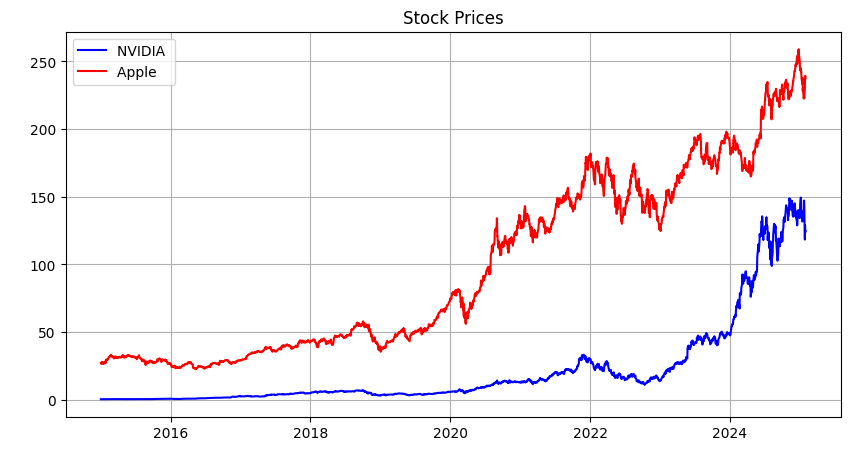

In [205]:
plt.figure(figsize=(10,5))


plt.plot(df_merged_cleaned.index, df_merged_cleaned['Price_nvd'], 
         label="NVIDIA ", color='blue', linestyle='solid')


plt.plot(df_merged_cleaned.index, df_merged_cleaned['Price_apple'], 
         label="Apple ", color='red', linestyle='solid')




plt.xlabel(" ")
plt.ylabel(' ')
plt.title("Stock Prices")
plt.legend()
plt.grid(True)




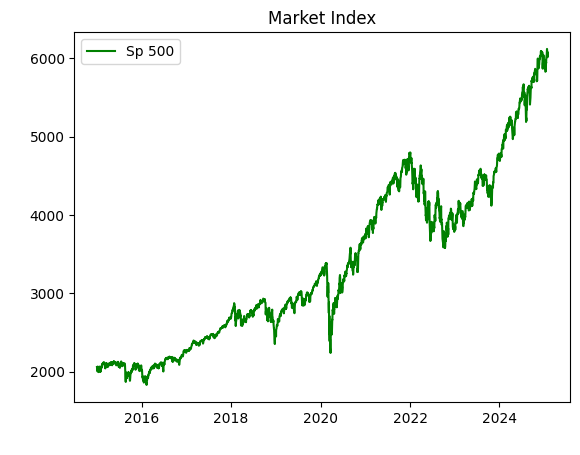

In [213]:

df_merged_cleaned = df_merged_cleaned.sort_values(by="Date")
df_merged_cleaned['Log_Price_sp_500'] = np.log(df_merged_cleaned['Price_sp_500'])

plt.plot(df_merged_cleaned.index, df_merged_cleaned['Price_sp_500'], label="Sp 500", color='green', linestyle='solid')

plt.xlabel(" ")
plt.ylabel(' ')
plt.title("Market Index")
plt.legend()
plt.grid(False)
#plt.plot(df_merged_cleaned.index, df_merged_cleaned['Log_Price_sp_500'], 
        # label="Sp 500", color='green', linestyle='solid')

In [218]:
import sys
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/var/folders/4v/k9cvf5896wzc9l712hb1qysh0000gn/T/ipykernel_29435/3304093355.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


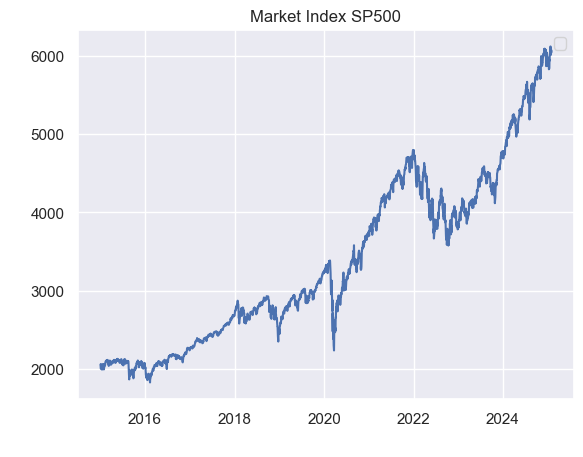

In [236]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.despine()
sns.lineplot(x=df_merged_cleaned.index, y='Price_sp_500',
             data=df_merged_cleaned)

plt.xlabel(" ")
plt.ylabel(' ')
plt.title("Market Index SP500")
plt.legend()

,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond,Log_Price_sp_500
Date,,,,,,,,,,,,,,
2015-01-02,15.43,-0.58,26.48,-0.19,46.76,0.67,0.50,0.00,NaN,-0.03,27.33,-0.94,0.02,NaN
2015-01-05,15.11,-2.07,25.97,-1.93,46.33,-0.92,0.49,-2.00,NaN,-1.83,26.56,-2.82,0.02,NaN
2015-01-06,14.76,-2.32,25.33,-2.46,45.65,-1.47,0.48,-2.04,NaN,-0.89,26.57,0.04,0.02,NaN
2015-01-07,14.92,1.08,25.26,-0.28,46.23,1.27,0.48,0.00,NaN,1.16,26.94,1.39,0.02,NaN
2015-01-08,15.02,0.67,25.35,0.36,47.59,2.94,0.50,4.17,NaN,1.79,27.97,3.82,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,234.85,-0.24,200.21,1.13,444.06,-0.59,142.62,-3.12,NaN,-0.29,222.78,-0.39,4.26,NaN
2025-01-27,235.42,0.24,191.81,-4.20,434.56,-2.14,118.42,-16.97,NaN,-1.46,229.86,3.18,4.26,NaN
2025-01-28,238.15,1.16,195.30,1.82,447.20,2.91,128.99,8.93,NaN,0.92,238.26,3.65,4.27,NaN


In [63]:
df_nvd.loc[2245:2246]
df_nvd= df_nvd.drop(df_nvd.index[[2245, 2246]])


In [67]:
df_nvd = df_nvd.sort_values(by='Date')

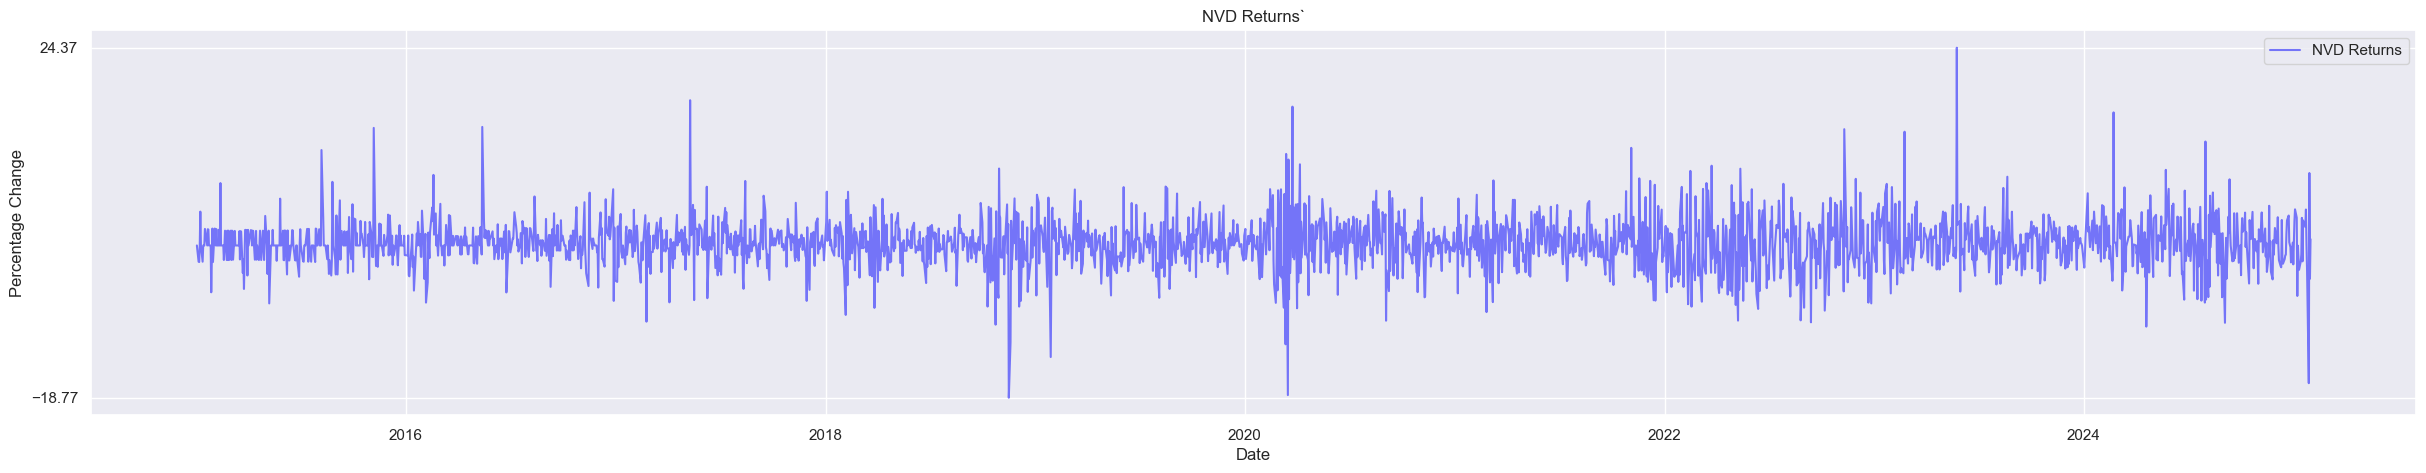

In [238]:

plt.figure(figsize=(30,5))

plt.plot(df_merged_cleaned.index, df_merged_cleaned['Change %_nvd'], label="NVD Returns", color='blue', alpha = 0.5 )
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.title("NVD Returns`")
plt.yticks([min(df_merged_cleaned['Change %_nvd']), max(df_merged_cleaned['Change %_nvd'])])
plt.legend()
plt.grid(True)




In [ ]:
# (Pt - pt-1)/ pt-1

#moving average 
## T(t) = 1/m sum(k, j = -k) Y(t+j)     m = 2k +1

In [240]:
import numpy as np

In [242]:
df_merged_cleaned['Log price'] = np.log(df_merged_cleaned['Price_apple'])

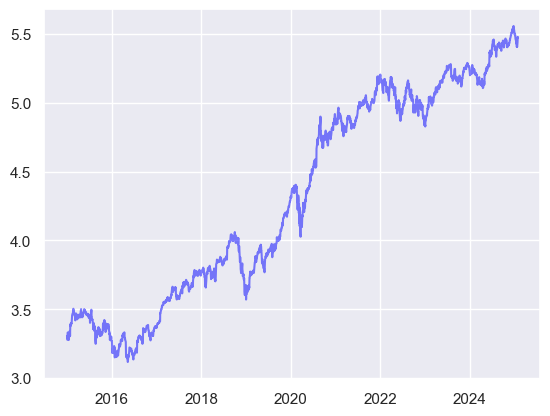

In [244]:
plt.plot(df_merged_cleaned.index, df_merged_cleaned['Log price'], label="Apple Log Prices", color='blue', alpha = 0.5 )

In [247]:
df_merged_cleaned['SMA_10_apple'] = df_merged_cleaned['Price_apple'].rolling(window=10).mean()  

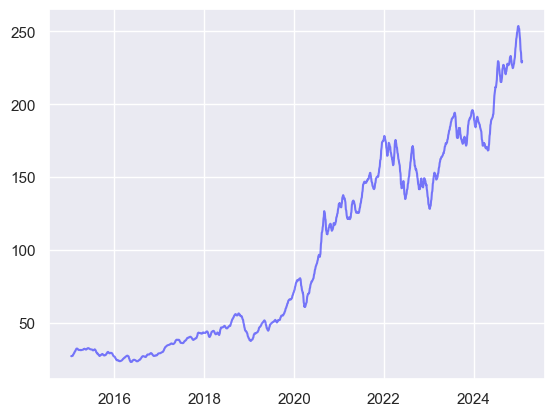

In [248]:
plt.plot(df_merged_cleaned.index, df_merged_cleaned['SMA_10_apple'], label='SMA_10_apple', color='blue', alpha = 0.5 )

In [249]:
from statsmodels.tsa.seasonal import STL

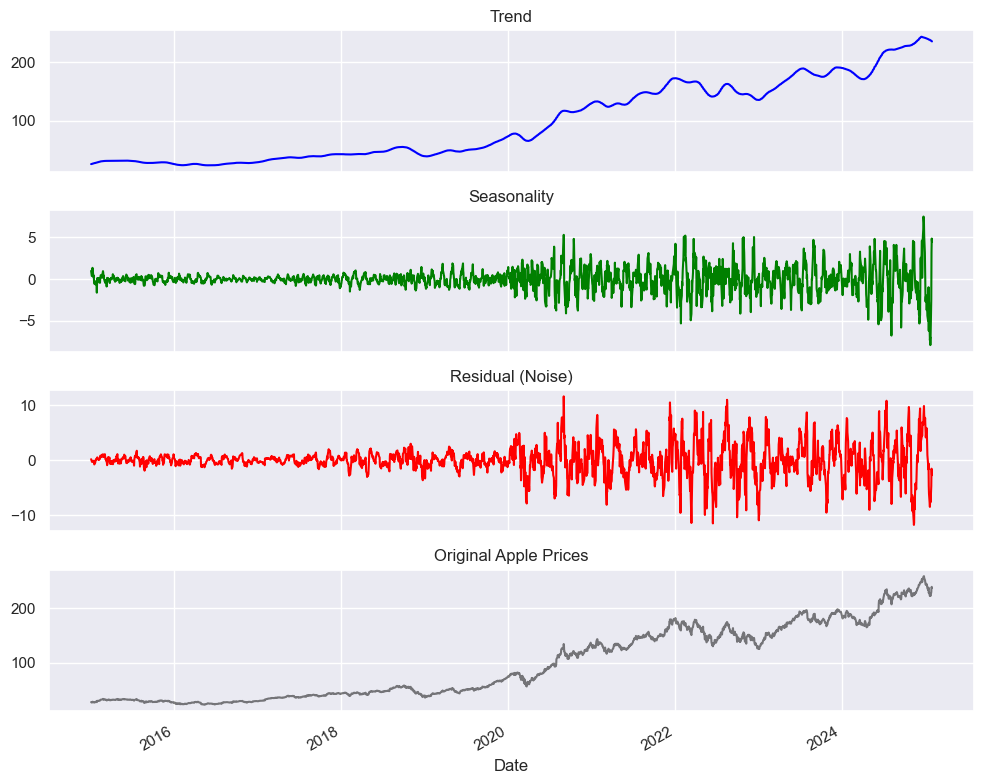

In [283]:

stl = STL(df_merged_cleaned['Price_apple'], period=30) 
result = stl.fit()
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
df_merged_cleaned['Price_apple'].plot(ax=axes[3], title="Original Apple Prices", color='black', alpha=0.5)
result.trend.plot(ax=axes[0], title="Trend", color='blue')
result.seasonal.plot(ax=axes[1], title="Seasonality", color='green')
result.resid.plot(ax=axes[2], title="Residual (Noise)", color='red')

plt.tight_layout()
plt.show()

In [284]:
var_resid = np.var(result.resid.dropna())   # Variance of residuals
var_trend = np.var(result.trend.dropna())   # Variance of trend
var_seasonal = np.var(result.seasonal.dropna())  # Variance of seasonal component

# Compute Strength of Trend and Seasonality
F_trend = 1 - (var_resid / (var_trend + var_resid))
F_seasonality = 1 - (var_resid / (var_seasonal + var_resid))

# Print results
print(f"Strength of Trend: {F_trend:.2f}")
print(f"Strength of Seasonality: {F_seasonality:.2f}")

Strength of Trend: 1.00
Strength of Seasonality: 0.20


In [285]:
print(df_merged_cleaned.index.to_series().diff().value_counts())  # Should show mostly one value

Date
1 days    1962
3 days     439
4 days      87
2 days      27
Name: count, dtype: int64


In [286]:
df_merged_cleaned = df_merged_cleaned.asfreq('D')  # Set daily frequency
df_merged_cleaned = df_merged_cleaned.interpolate()  # Fill missing values

In [287]:
print(df_merged_cleaned.index.to_series().diff().value_counts())

Date
1 days    3681
Name: count, dtype: int64


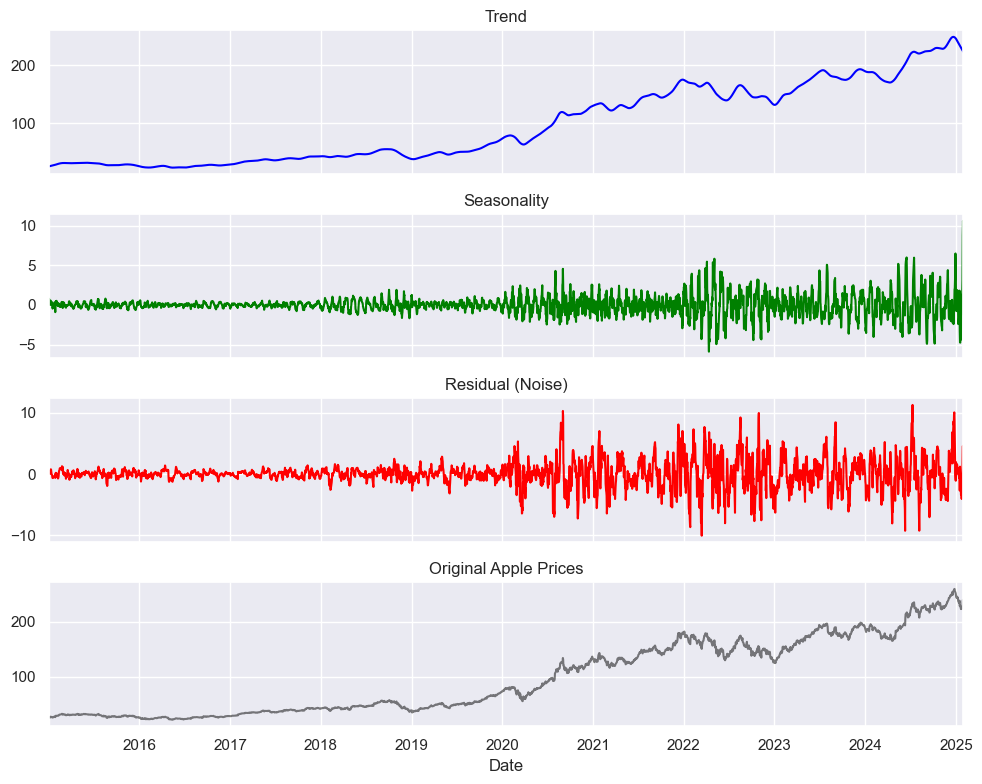

In [295]:
stl = STL(df_merged_cleaned['Price_apple'], period=30) 
result = stl.fit()
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
df_merged_cleaned['Price_apple'].plot(ax=axes[3], title="Original Apple Prices", color='black', alpha=0.5)
result.trend.plot(ax=axes[0], title="Trend", color='blue')
result.seasonal.plot(ax=axes[1], title="Seasonality", color='green')
result.resid.plot(ax=axes[2], title="Residual (Noise)", color='red')

plt.tight_layout()
plt.show()

In [297]:
var_resid = np.var(result.resid.dropna())   # Variance of residuals
var_trend = np.var(result.trend.dropna())   # Variance of trend
var_seasonal = np.var(result.seasonal.dropna())  # Variance of seasonal component

# Compute Strength of Trend and Seasonality
F_trend = 1 - (var_resid / (var_trend + var_resid))
F_seasonality = 1 - (var_resid / (var_seasonal + var_resid))

# Print results
print(f"Strength of Trend: {F_trend:.2f}")
print(f"Strength of Seasonality: {F_seasonality:.2f}")

Strength of Trend: 1.00
Strength of Seasonality: 0.25


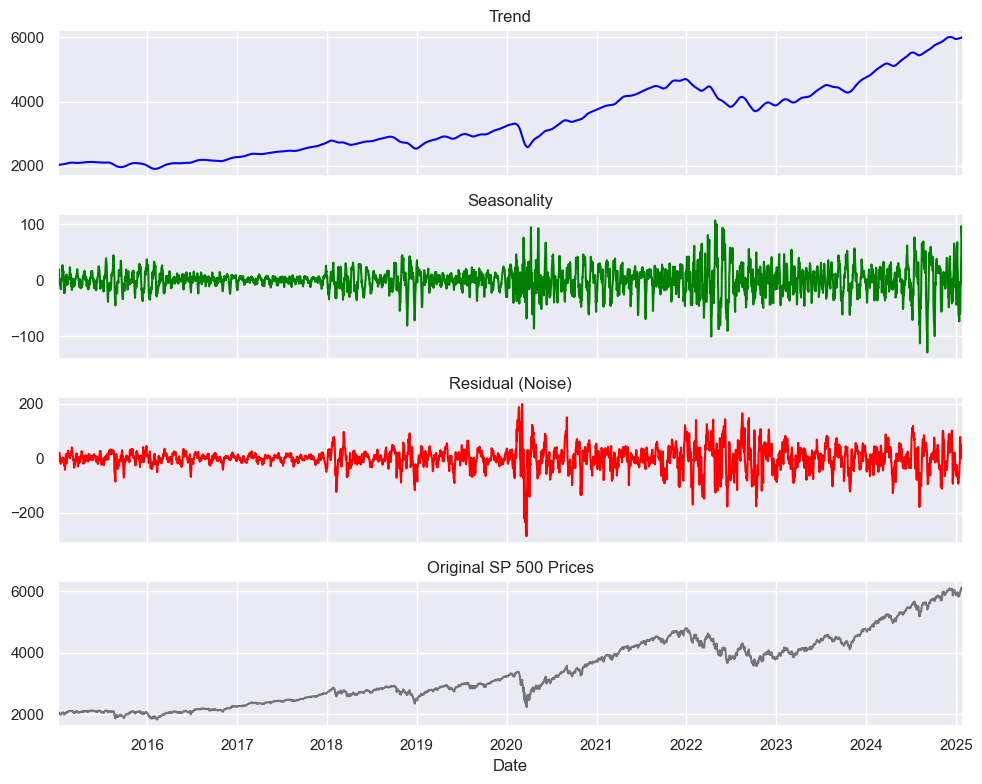

In [304]:
stl = STL(df_merged_cleaned['Price_sp_500'], period=30) 
result = stl.fit()
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
df_merged_cleaned['Price_sp_500'].plot(ax=axes[3], title="Original SP 500 Prices", color='black', alpha=0.5)
result.trend.plot(ax=axes[0], title="Trend", color='blue')
result.seasonal.plot(ax=axes[1], title="Seasonality", color='green')
result.resid.plot(ax=axes[2], title="Residual (Noise)", color='red')

plt.tight_layout()
plt.show()

In [303]:
var_resid = np.var(result.resid.dropna())   # Variance of residuals
var_trend = np.var(result.trend.dropna())   # Variance of trend
var_seasonal = np.var(result.seasonal.dropna())  # Variance of seasonal component

# Compute Strength of Trend and Seasonality
F_trend = 1 - (var_resid / (var_trend + var_resid))
F_seasonality = 1 - (var_resid / (var_seasonal + var_resid))

# Print results
print(f"Strength of Trend: {F_trend:.2f}")
print(f"Strength of Seasonality: {F_seasonality:.2f}")

Strength of Trend: 1.00
Strength of Seasonality: 0.29


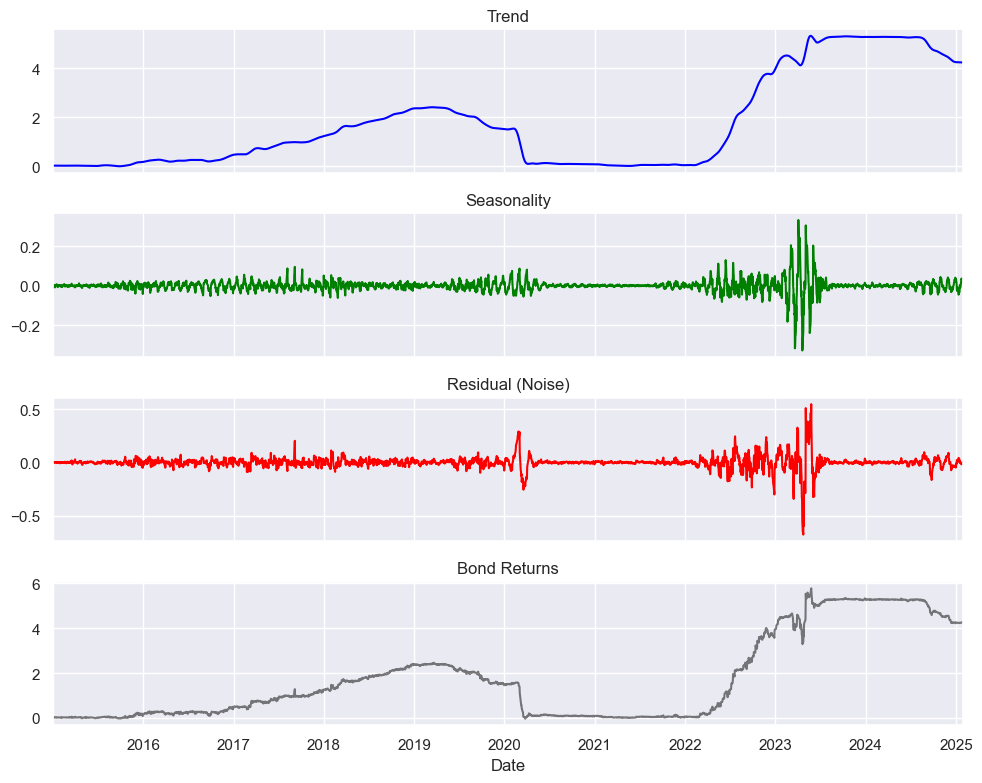

In [307]:
stl = STL(df_merged_cleaned['Change_bond'], period=30) 
result = stl.fit()
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
df_merged_cleaned['Change_bond'].plot(ax=axes[3], title="Bond Returns", color='black', alpha=0.5)
result.trend.plot(ax=axes[0], title="Trend", color='blue')
result.seasonal.plot(ax=axes[1], title="Seasonality", color='green')
result.resid.plot(ax=axes[2], title="Residual (Noise)", color='red')

plt.tight_layout()
plt.show()

In [305]:
df_merged_cleaned

,Price_am,Change %_am,Price_alpha,Change %_alpha,Price_mic,Change %_mic,Price_nvd,Change %_nvd,Price_sp_500,Change %_sp_500,Price_apple,Change %_apple,Change_bond
Date,,,,,,,,,,,,,
2015-01-02,15.430000,-0.580000,26.48,-0.190000,46.760000,0.670000,0.500000,0.000000,2058.200000,-0.03,27.330000,-0.940000,0.02
2015-01-03,15.323333,-1.076667,26.31,-0.770000,46.616667,0.140000,0.496667,-0.666667,2045.666667,-0.63,27.073333,-1.566667,0.02
2015-01-04,15.216667,-1.573333,26.14,-1.350000,46.473333,-0.390000,0.493333,-1.333333,2033.133333,-1.23,26.816667,-2.193333,0.02
2015-01-05,15.110000,-2.070000,25.97,-1.930000,46.330000,-0.920000,0.490000,-2.000000,2020.600000,-1.83,26.560000,-2.820000,0.02
2015-01-06,14.760000,-2.320000,25.33,-2.460000,45.650000,-1.470000,0.480000,-2.040000,2002.600000,-0.89,26.570000,0.040000,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-26,235.230000,0.080000,194.61,-2.423333,437.726667,-1.623333,126.486667,-12.353333,6041.933333,-1.07,227.500000,1.990000,4.26
2025-01-27,235.420000,0.240000,191.81,-4.200000,434.560000,-2.140000,118.420000,-16.970000,6012.280000,-1.46,229.860000,3.180000,4.26
2025-01-28,238.150000,1.160000,195.30,1.820000,447.200000,2.910000,128.990000,8.930000,6067.700000,0.92,238.260000,3.650000,4.27
